# Canny

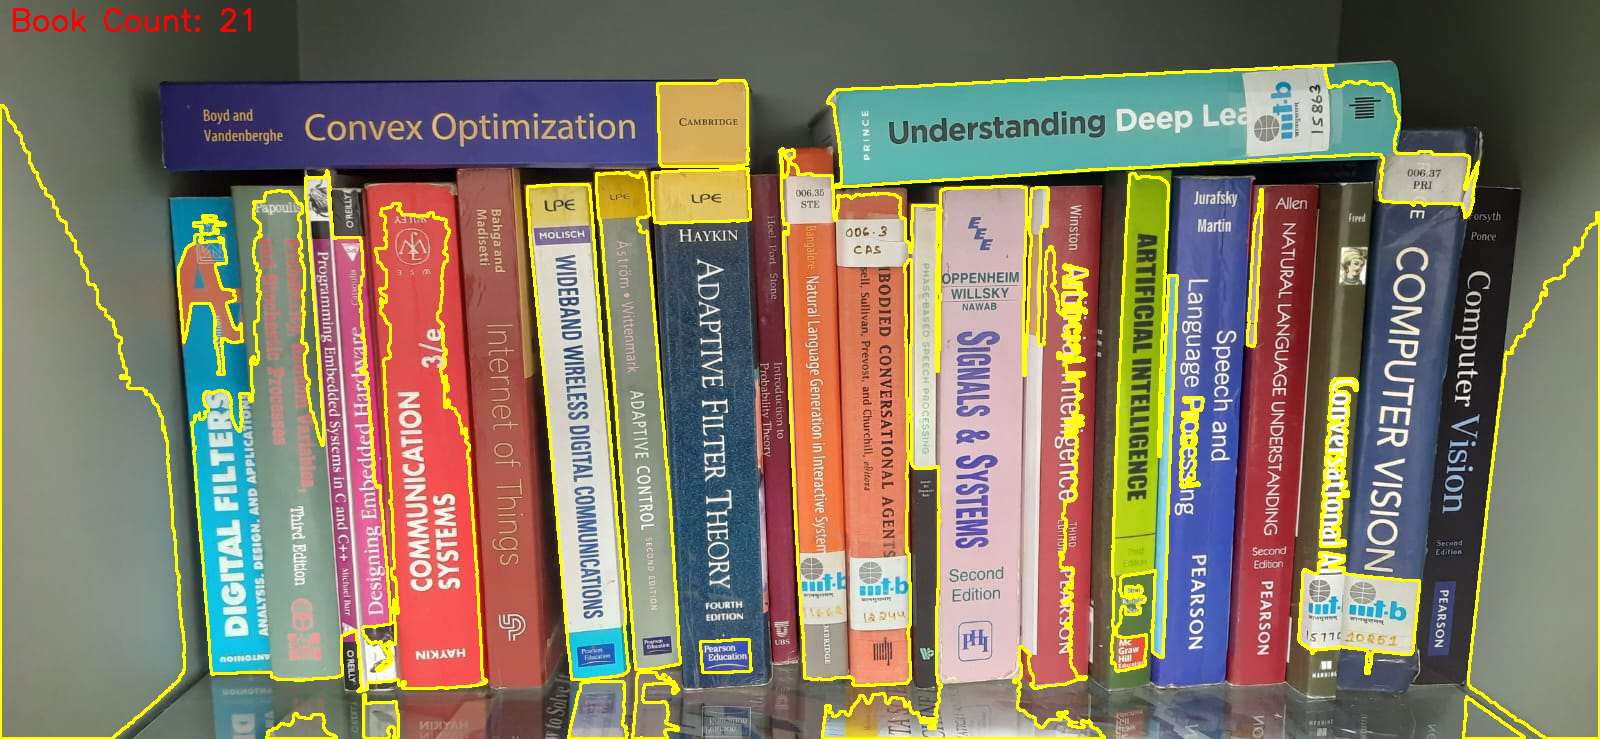

In [1]:
import cv2
from google.colab.patches import cv2_imshow

input_image = cv2.imread('BookCount_1.jpeg')

# Convert the image to grayscale
gray_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

# Apply GaussianBlur to reduce noise
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Thresholding to create a binary image
_, binary_threshold = cv2.threshold(blurred_image, 120, 255, cv2.THRESH_BINARY)

# Find contours in the binary image
contours, _ = cv2.findContours(binary_threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours on a copy of the original image
image_with_detected_books = input_image.copy()

# Initialize a variable to count the number of books
detected_book_count = 0

# Set a threshold for contour area (adjust this value based on your image)
min_contour_area_threshold = 1000

# Draw borders around objects in yellow color on the original image
for contour in contours:
    contour_area = cv2.contourArea(contour)

    # Filter out small contours
    if contour_area > min_contour_area_threshold:
        cv2.drawContours(image_with_detected_books, [contour], -1, (0, 255, 255), 2)  # Yellow borders
        detected_book_count += 1

cv2.putText(image_with_detected_books, f'Book Count: {detected_book_count}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
cv2_imshow(image_with_detected_books)


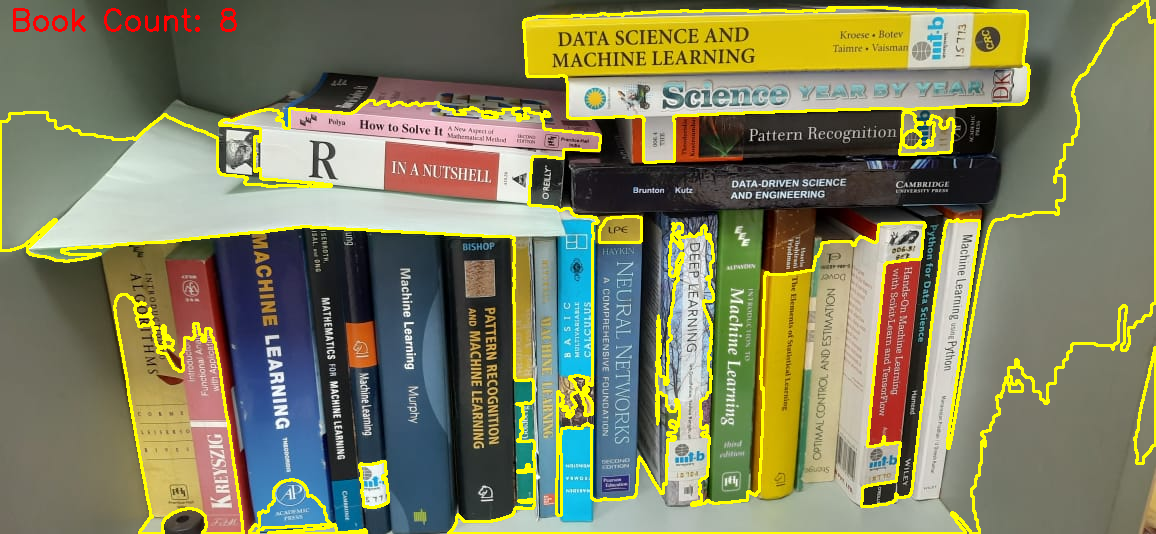

In [2]:
import cv2
from google.colab.patches import cv2_imshow

input_image = cv2.imread('BookCount_2.jpeg')

# Convert the image to grayscale
gray_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

# Apply GaussianBlur to reduce noise
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Thresholding to create a binary image
_, binary_threshold = cv2.threshold(blurred_image, 120, 255, cv2.THRESH_BINARY)

# Find contours in the binary image
contours, _ = cv2.findContours(binary_threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours on a copy of the original image
image_with_detected_books = input_image.copy()

# Initialize a variable to count the number of books
detected_book_count = 0

# Set a threshold for contour area (adjust this value based on your image)
min_contour_area_threshold = 1000

# Draw borders around objects in yellow color on the original image
for contour in contours:
    contour_area = cv2.contourArea(contour)

    # Filter out small contours
    if contour_area > min_contour_area_threshold:
        cv2.drawContours(image_with_detected_books, [contour], -1, (0, 255, 255), 2)  # Yellow borders
        detected_book_count += 1

cv2.putText(image_with_detected_books, f'Book Count: {detected_book_count}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
cv2_imshow(image_with_detected_books)


# Yolo

In [3]:
# Download YOLOv3 weights file
!wget https://pjreddie.com/media/files/yolov3.weights

# Download YOLOv3 configuration file
!wget https://github.com/pjreddie/darknet/blob/master/cfg/yolov3.cfg?raw=true -O yolov3.cfg

# Download YOLOv3 class names file
!wget https://github.com/pjreddie/darknet/blob/master/data/coco.names?raw=true -O coco.names


--2024-02-04 15:57:50--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  14.3MB/s    in 15s     

2024-02-04 15:58:19 (15.4 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]

--2024-02-04 15:58:19--  https://github.com/pjreddie/darknet/blob/master/cfg/yolov3.cfg?raw=true
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/pjreddie/darknet/raw/master/cfg/yolov3.cfg [following]
--2024-02-04 15:58:19--  https://github.com/pjreddie/darknet/raw/master/cfg/yolov3.cfg
Reusing existing connection to github.com:443.
HTTP request sent, awaiti

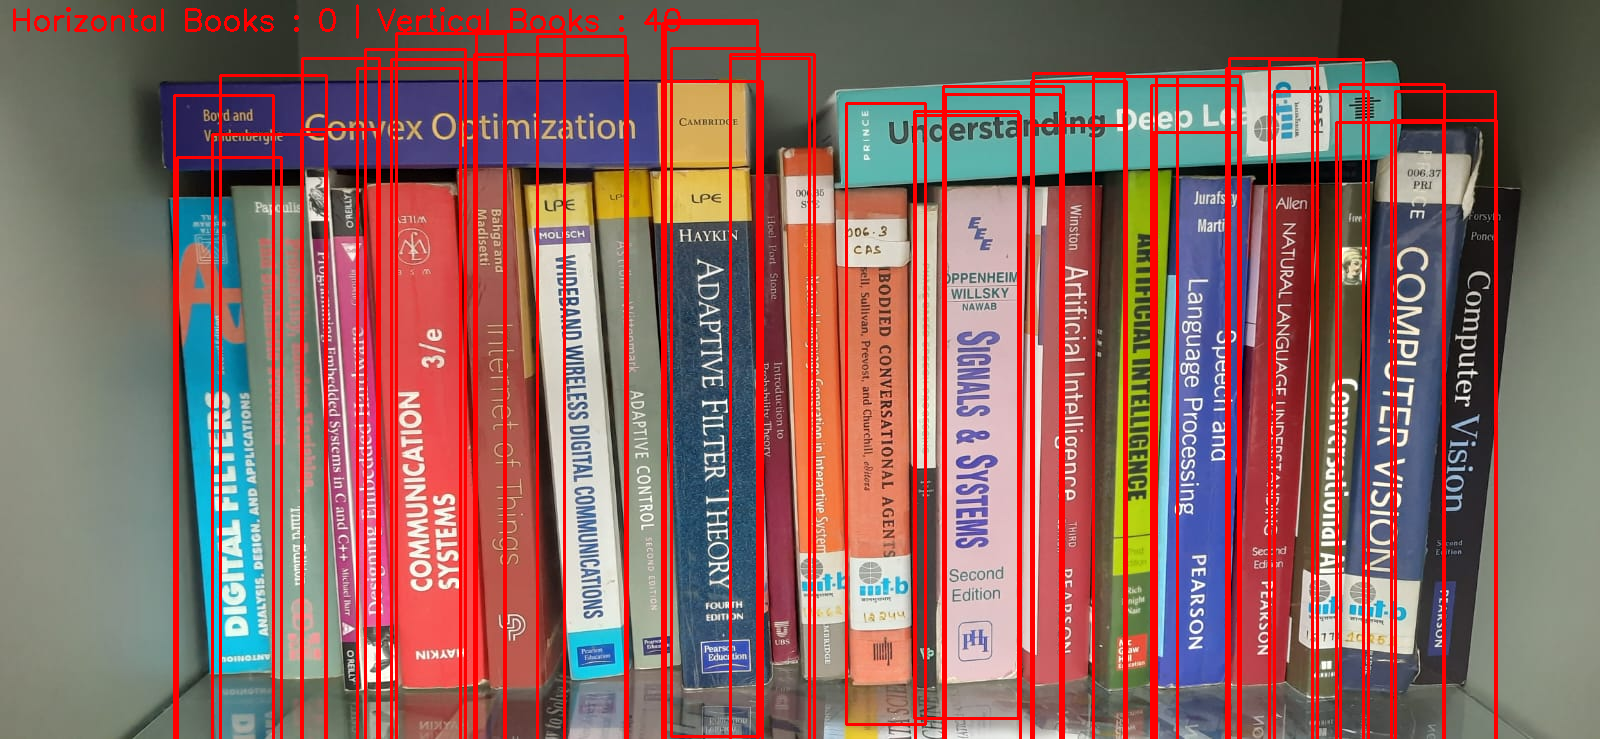

In [5]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

# Load YOLO model
yolo_net = cv2.dnn.readNet('yolov3.weights', 'yolov3.cfg')

# Load classes for YOLO
with open('coco.names', 'r') as class_file:
    yolo_classes = class_file.read().strip().split('\n')

input_image = cv2.imread('BookCount_1.jpeg')
img_height, img_width = input_image.shape[:2]

# Create blob from image for YOLO
yolo_blob = cv2.dnn.blobFromImage(input_image, 1/255.0, (416, 416), swapRB=True, crop=False)

yolo_net.setInput(yolo_blob)

# Get output layer names for YOLO
yolo_output_layer_names = yolo_net.getUnconnectedOutLayersNames()

# Forward pass through YOLO
yolo_detections = yolo_net.forward(yolo_output_layer_names)

# Initialize counters for horizontal and vertical books
yolo_horizontal_books = 0
yolo_vertical_books = 0

# Loop over the YOLO detections
for yolo_detection in yolo_detections:
    for yolo_object in yolo_detection:
        yolo_scores = yolo_object[5:]
        yolo_class_id = np.argmax(yolo_scores)
        yolo_confidence = yolo_scores[yolo_class_id]

        if yolo_confidence > 0.5:
            yolo_center_x = int(yolo_object[0] * img_width)
            yolo_center_y = int(yolo_object[1] * img_height)
            yolo_w = int(yolo_object[2] * img_width)
            yolo_h = int(yolo_object[3] * img_height)

            yolo_x = int(yolo_center_x - yolo_w / 2)
            yolo_y = int(yolo_center_y - yolo_h / 2)

            # Check if aspect ratio suggests a horizontal book
            yolo_aspect_ratio = yolo_w / yolo_h
            if yolo_aspect_ratio > 1.5:
                yolo_horizontal_books += 1
                cv2.rectangle(input_image, (yolo_x, yolo_y), (yolo_x + yolo_w, yolo_y + yolo_h), (0, 255, 0), 2)
            else:
                yolo_vertical_books += 1
                cv2.rectangle(input_image, (yolo_x, yolo_y), (yolo_x + yolo_w, yolo_y + yolo_h), (0, 0, 255), 2)

cv2.putText(input_image, f'Horizontal Books : {yolo_horizontal_books} | Vertical Books : {yolo_vertical_books}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
cv2_imshow(input_image)


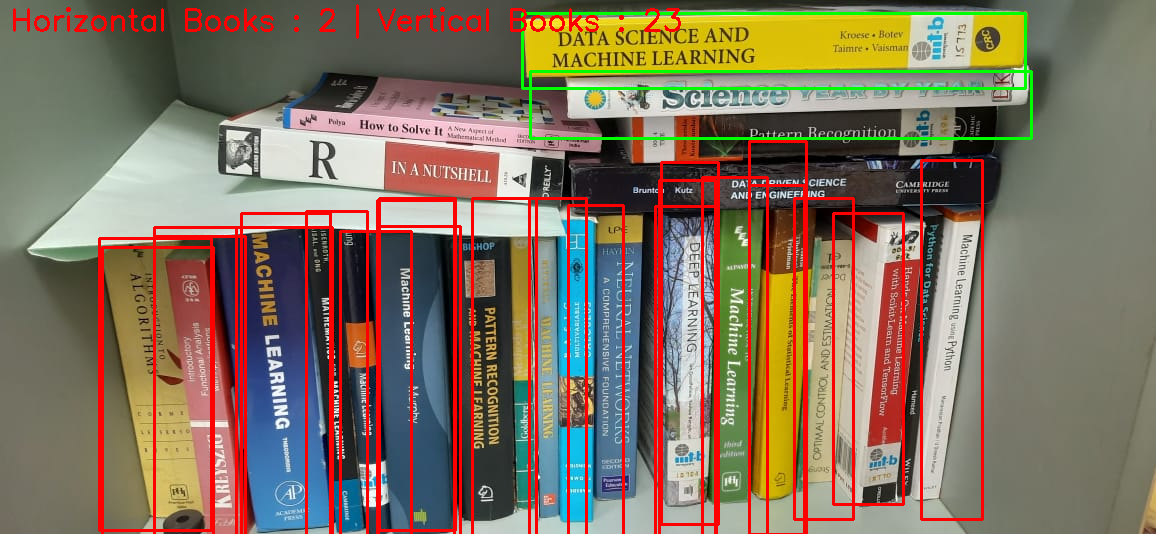

In [6]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

# Load YOLO model
yolo_net = cv2.dnn.readNet('yolov3.weights', 'yolov3.cfg')

# Load classes for YOLO
with open('coco.names', 'r') as class_file:
    yolo_classes = class_file.read().strip().split('\n')

input_image = cv2.imread('BookCount_2.jpeg')
img_height, img_width = input_image.shape[:2]

# Create blob from image for YOLO
yolo_blob = cv2.dnn.blobFromImage(input_image, 1/255.0, (416, 416), swapRB=True, crop=False)

yolo_net.setInput(yolo_blob)

# Get output layer names for YOLO
yolo_output_layer_names = yolo_net.getUnconnectedOutLayersNames()

# Forward pass through YOLO
yolo_detections = yolo_net.forward(yolo_output_layer_names)

# Initialize counters for horizontal and vertical books
yolo_horizontal_books = 0
yolo_vertical_books = 0

# Loop over the YOLO detections
for yolo_detection in yolo_detections:
    for yolo_object in yolo_detection:
        yolo_scores = yolo_object[5:]
        yolo_class_id = np.argmax(yolo_scores)
        yolo_confidence = yolo_scores[yolo_class_id]

        if yolo_confidence > 0.5:
            yolo_center_x = int(yolo_object[0] * img_width)
            yolo_center_y = int(yolo_object[1] * img_height)
            yolo_w = int(yolo_object[2] * img_width)
            yolo_h = int(yolo_object[3] * img_height)

            yolo_x = int(yolo_center_x - yolo_w / 2)
            yolo_y = int(yolo_center_y - yolo_h / 2)

            # Check if aspect ratio suggests a horizontal book
            yolo_aspect_ratio = yolo_w / yolo_h
            if yolo_aspect_ratio > 1.5:
                yolo_horizontal_books += 1
                cv2.rectangle(input_image, (yolo_x, yolo_y), (yolo_x + yolo_w, yolo_y + yolo_h), (0, 255, 0), 2)
            else:
                yolo_vertical_books += 1
                cv2.rectangle(input_image, (yolo_x, yolo_y), (yolo_x + yolo_w, yolo_y + yolo_h), (0, 0, 255), 2)

cv2.putText(input_image, f'Horizontal Books : {yolo_horizontal_books} | Vertical Books : {yolo_vertical_books}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
cv2_imshow(input_image)


# Hough Transform

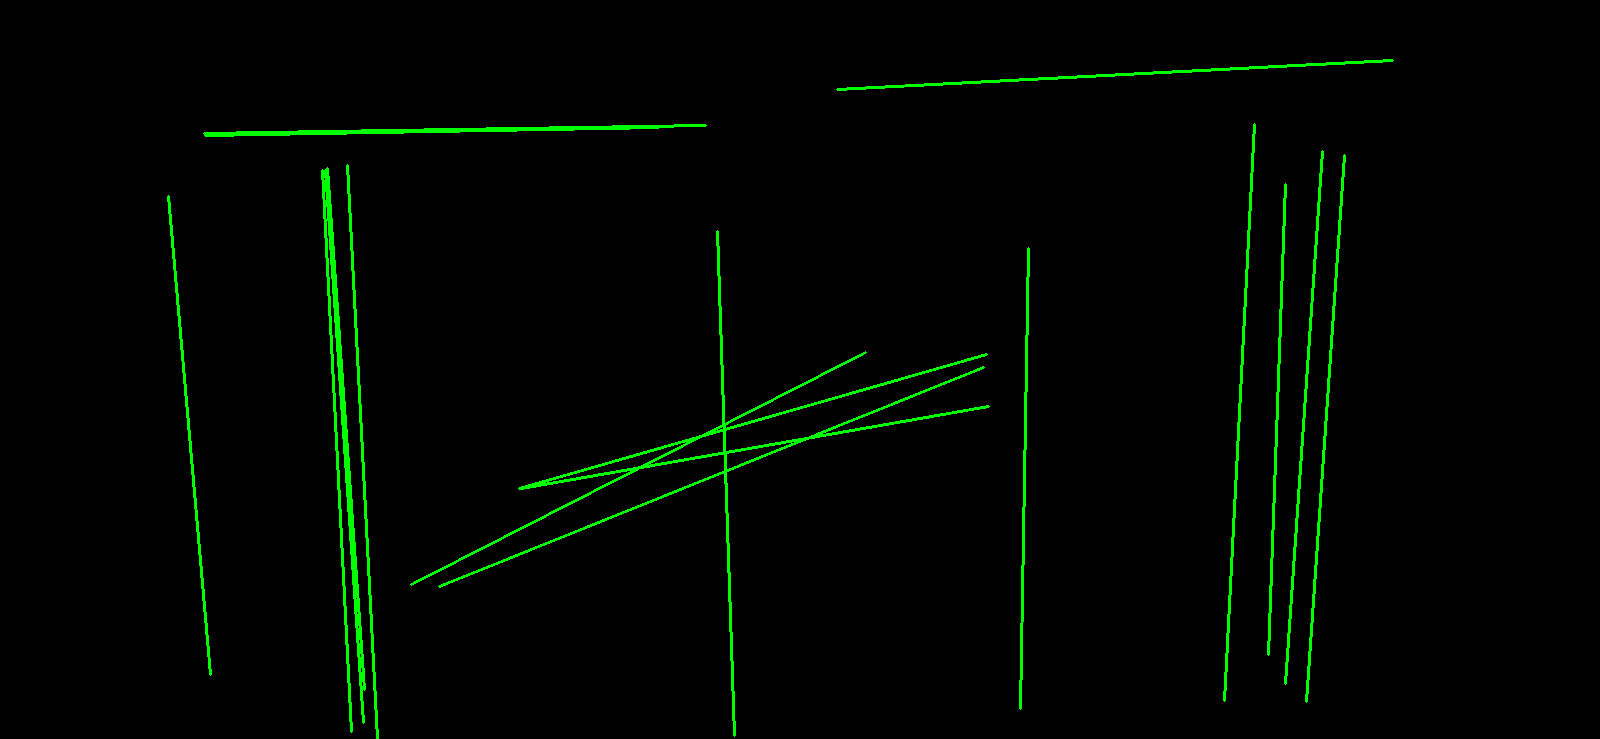

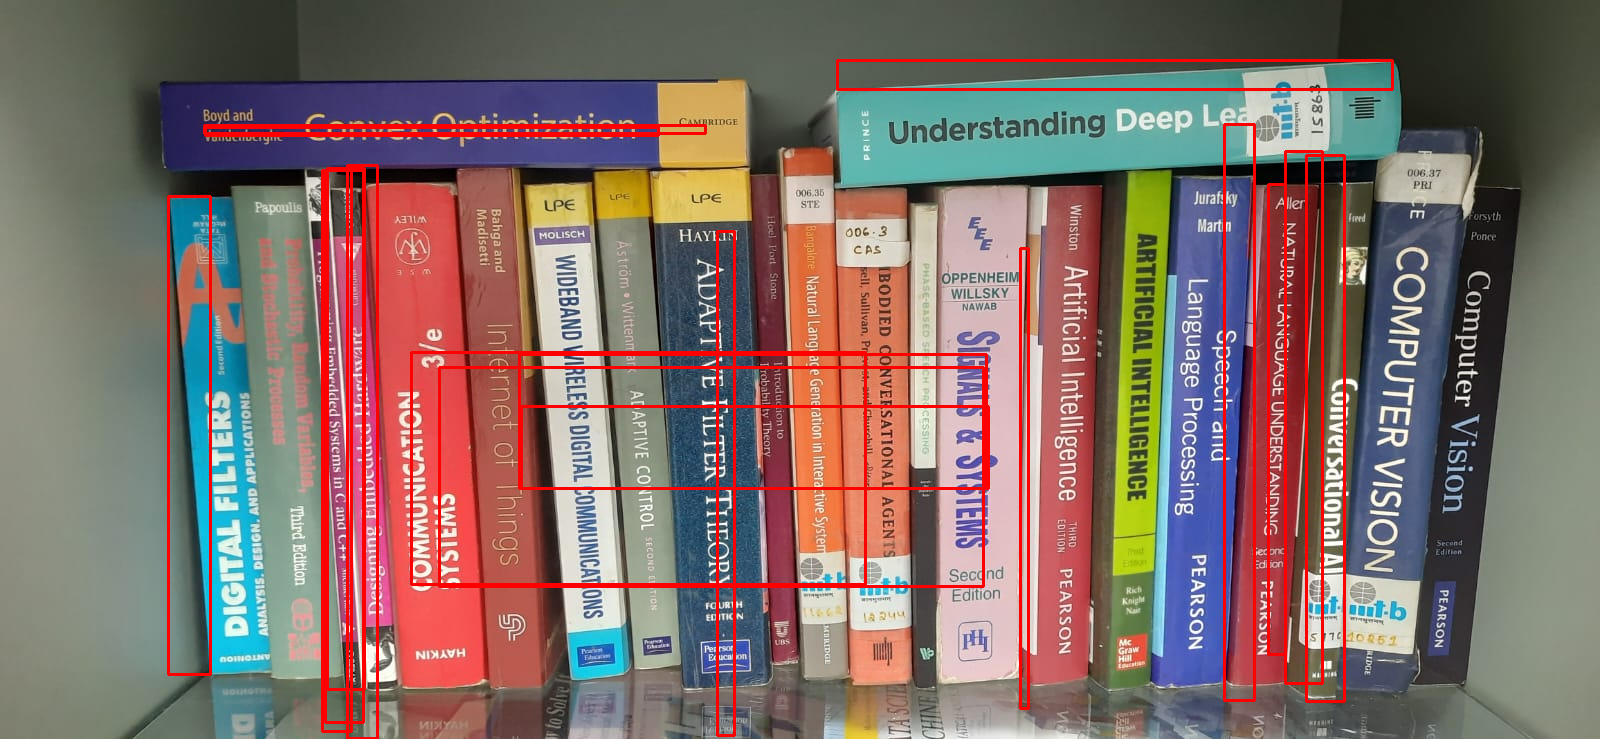

Number of books detected: 110


In [7]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def identify_books(image_path):

    input_image = cv2.imread(image_path)

    # Convert the image to grayscale
    grayscale_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

    # Apply edge detection using Canny method
    edges = cv2.Canny(grayscale_image, 50, 150)

    # Use Hough Transform to detect lines
    detected_lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=100, minLineLength=450, maxLineGap=23)


    lines_image = np.zeros_like(input_image)

    # Draw green lines on the lines image
    for line in detected_lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(lines_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Identify rectangles formed by intersecting lines
    rectangles = []
    for line1 in detected_lines:
        for line2 in detected_lines:
            if line1 is not line2:
                x1, y1, x2, y2 = line1[0]
                x3, y3, x4, y4 = line2[0]
                angle1 = np.arctan2(y2 - y1, x2 - x1)
                angle2 = np.arctan2(y4 - y3, x4 - x3)

                # Check if the lines are roughly perpendicular and form a rectangle
                if np.abs(angle1 - angle2) < np.pi/4:
                    rectangles.append((line1[0], line2[0]))


    rectangles_image = input_image.copy()


    for rectangle in rectangles:
        (x1, y1, x2, y2), (x3, y3, x4, y4) = rectangle
        cv2.rectangle(rectangles_image, (x1, y1), (x2, y2), (0, 0, 255), 2)
        cv2.rectangle(rectangles_image, (x3, y3), (x4, y4), (0, 0, 255), 2)


    cv2_imshow(lines_image)
    cv2_imshow(rectangles_image)


    return len(rectangles)


input_image_path = '/content/BookCount_1.jpeg'
detected_books_count = identify_books(input_image_path)
print(f'Number of books detected: {detected_books_count}')

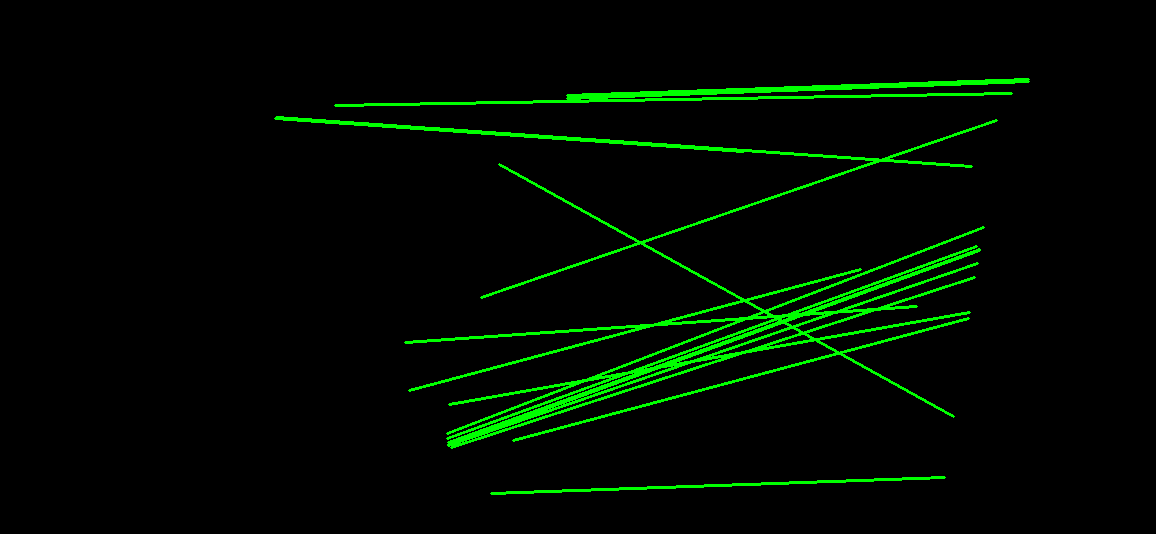

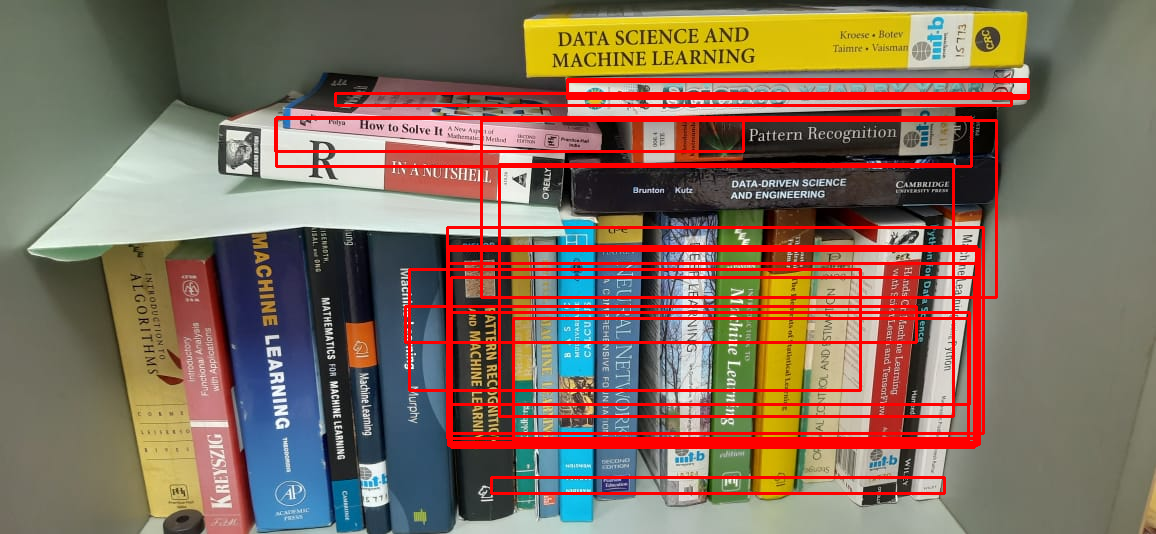

Number of books detected: 310


In [8]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def identify_books(image_path):

    input_image = cv2.imread(image_path)

    # Convert the image to grayscale
    grayscale_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

    # Apply edge detection using Canny method
    edges = cv2.Canny(grayscale_image, 50, 150)

    # Use Hough Transform to detect lines
    detected_lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=100, minLineLength=450, maxLineGap=23)


    lines_image = np.zeros_like(input_image)

    # Draw green lines on the lines image
    for line in detected_lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(lines_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Identify rectangles formed by intersecting lines
    rectangles = []
    for line1 in detected_lines:
        for line2 in detected_lines:
            if line1 is not line2:
                x1, y1, x2, y2 = line1[0]
                x3, y3, x4, y4 = line2[0]
                angle1 = np.arctan2(y2 - y1, x2 - x1)
                angle2 = np.arctan2(y4 - y3, x4 - x3)

                # Check if the lines are roughly perpendicular and form a rectangle
                if np.abs(angle1 - angle2) < np.pi/4:
                    rectangles.append((line1[0], line2[0]))


    rectangles_image = input_image.copy()


    for rectangle in rectangles:
        (x1, y1, x2, y2), (x3, y3, x4, y4) = rectangle
        cv2.rectangle(rectangles_image, (x1, y1), (x2, y2), (0, 0, 255), 2)
        cv2.rectangle(rectangles_image, (x3, y3), (x4, y4), (0, 0, 255), 2)


    cv2_imshow(lines_image)
    cv2_imshow(rectangles_image)


    return len(rectangles)


input_image_path = '/content/BookCount_2.jpeg'
detected_books_count = identify_books(input_image_path)
print(f'Number of books detected: {detected_books_count}')
